<a href="https://colab.research.google.com/github/RoseMwangi98/REGRESSION_HOUSE_PREDICTION/blob/main/House_Prediction_ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Defining the Question

Hass Consulting Company , a real estste company , would like to investigate the factors that affect housing prices using the given information on real estate properties that was collected over some months.
The company would then like to predict the sale price of Houses upon being provided with the predictor variables.

2. Metric for Success


The metric for success for this analysis for the company would be to determine the exact features that influence the price of a house and to predict the sale prices.
Ideally as a researcher while building my model, the metric of success will be measured by the Coefficient of Determination. I would like to obtain an r2_score of 0.80 or above while evaluating the performance of my model.

3. Experimental Design Taken


This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data.
Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset,
Finally I will build several models:
Multiple Linear Regression
Quantile Regression

4. Exploring the Dataset

The Dataset given has 20 columns , with the dependent variable being the Price of the house and the other variables being the features.
The descriptions for these columns is provided below.
5. The appropriateness of the available data to answer the given question

Given the objectives of my analysis the Data available is appropriate.


**LOADING THE DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
house=pd.read_csv("house_data.csv")
house.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [3]:
house.shape

(21613, 20)

In [4]:
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**DATA CLEANING**

In [6]:
#check for missing values in our dataset
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#check for duplicates
house.duplicated().sum()

3

In [8]:
#drop duplicates
house.drop_duplicates(inplace=True)

In [9]:
#  Dropping irrelevant columns

house.drop(['id','lat','long','waterfront'], axis=1, inplace=True)

In [ ]:
cate_variable = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
continous_variable= ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']

**REMOVING OUTLIERS AND ANOMALIES**

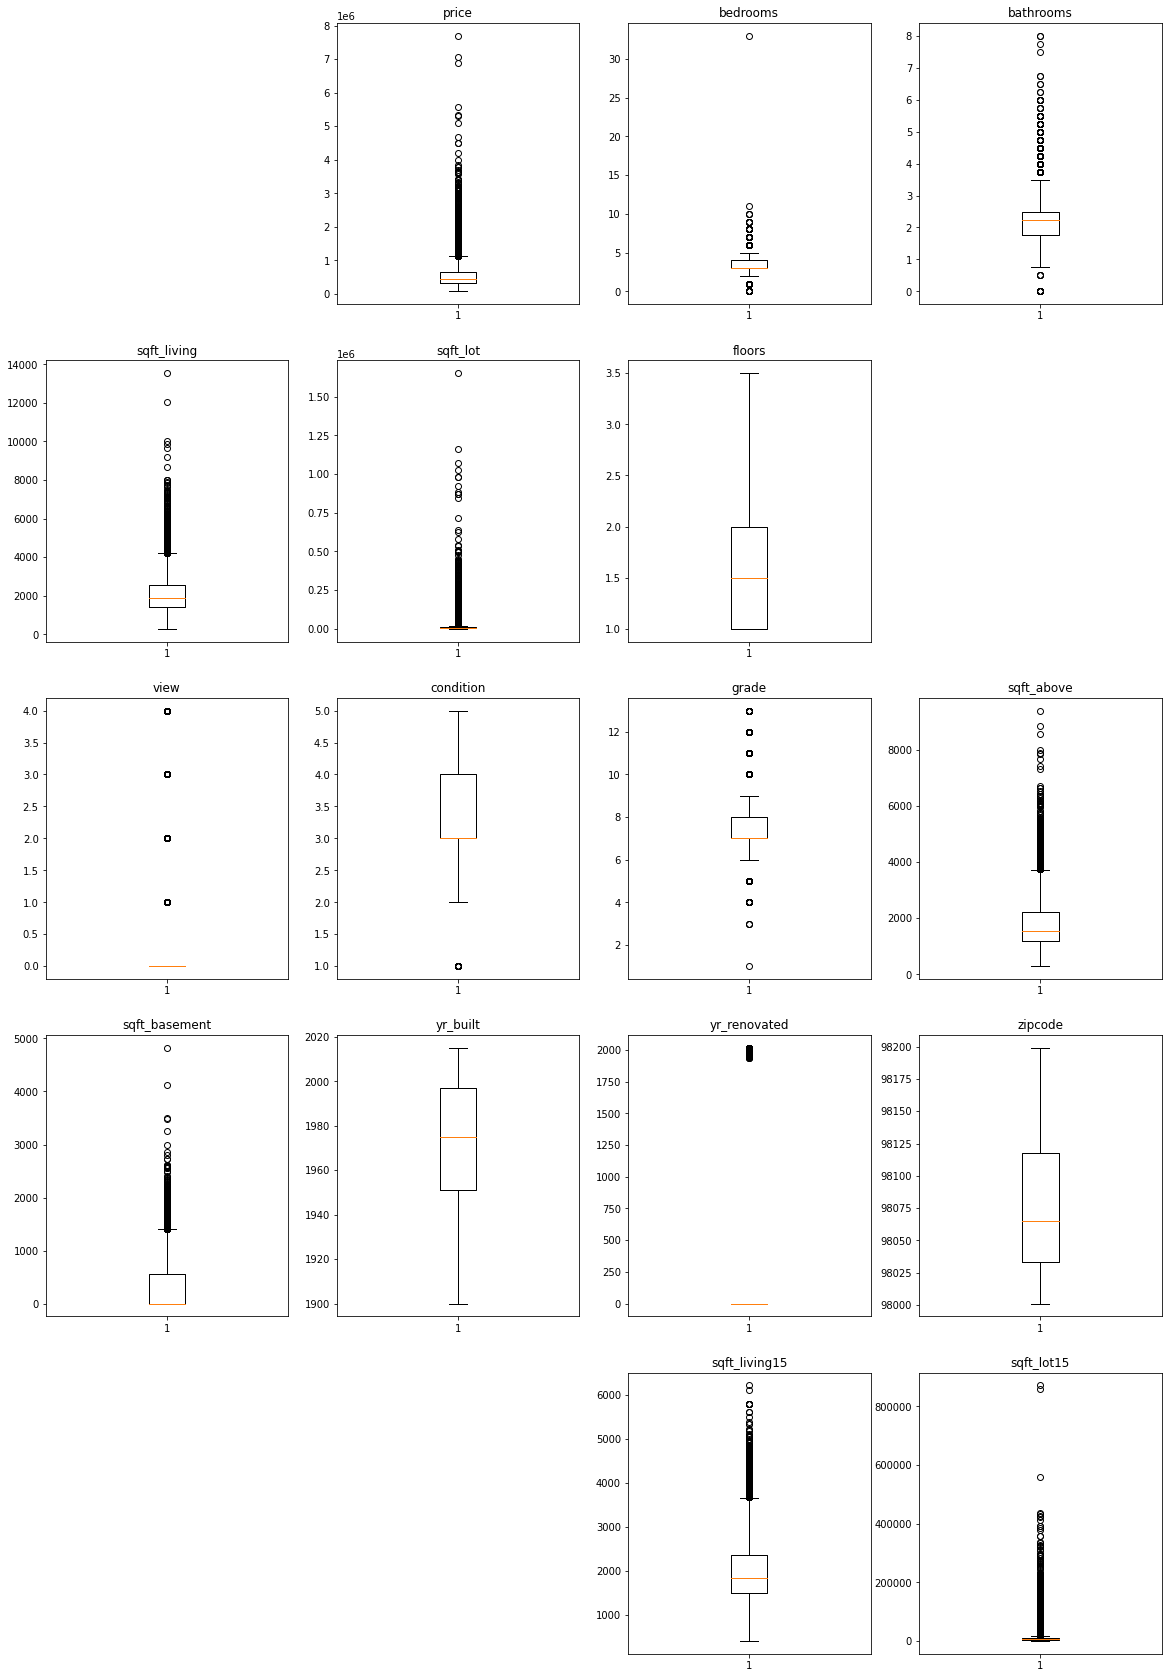

In [ ]:
#check for outliers in our dataset
# save the column names onto a dictionary
columns_dict = {'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7,  'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(house[variable])
  plt.title(variable)

plt.show()

In [ ]:
# dealing with outliers
# quantiles
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = house[~((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(house.shape)

(15072, 16)
(21610, 16)


**EXPLONATORY ANALYSIS**

In [ ]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,1.507200e+04,15072.00000,15072.000000,15072.000000,15072.000000,15072.000000,15072.0,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.0,15072.000000,15072.000000,15072.000000
mean,4.379252e+05,3.26181,1.972134,1813.863455,7018.603171,1.471105,0.0,3.418923,7.379644,1586.107418,227.756038,1971.819599,0.0,98079.442476,1796.424562,6899.001327
std,1.801669e+05,0.77152,0.645457,614.611956,3367.109330,0.547321,0.0,0.646593,0.804311,601.720622,352.627219,29.202805,0.0,53.345477,508.071585,3002.841222
min,8.200000e+04,2.00000,0.750000,560.000000,520.000000,1.000000,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,98001.000000,620.000000,651.000000
25%,3.000000e+05,3.00000,1.500000,1350.000000,4720.000000,1.000000,0.0,3.000000,7.000000,1140.000000,0.000000,1953.000000,0.0,98033.000000,1420.000000,4800.000000
50%,4.050000e+05,3.00000,2.000000,1740.000000,7068.500000,1.000000,0.0,3.000000,7.000000,1430.000000,0.000000,1975.000000,0.0,98065.000000,1700.000000,7200.000000
75%,5.450000e+05,4.00000,2.500000,2210.000000,8991.000000,2.000000,0.0,4.000000,8.000000,1910.000000,440.000000,1999.000000,0.0,98118.000000,2095.000000,8700.000000
max,1.130000e+06,5.00000,3.500000,4200.000000,19141.000000,3.500000,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,0.0,98199.000000,3640.000000,17550.000000


In [ ]:
df1['price'].describe()

count    1.507200e+04
mean     4.379252e+05
std      1.801669e+05
min      8.200000e+04
25%      3.000000e+05
50%      4.050000e+05
75%      5.450000e+05
max      1.130000e+06
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

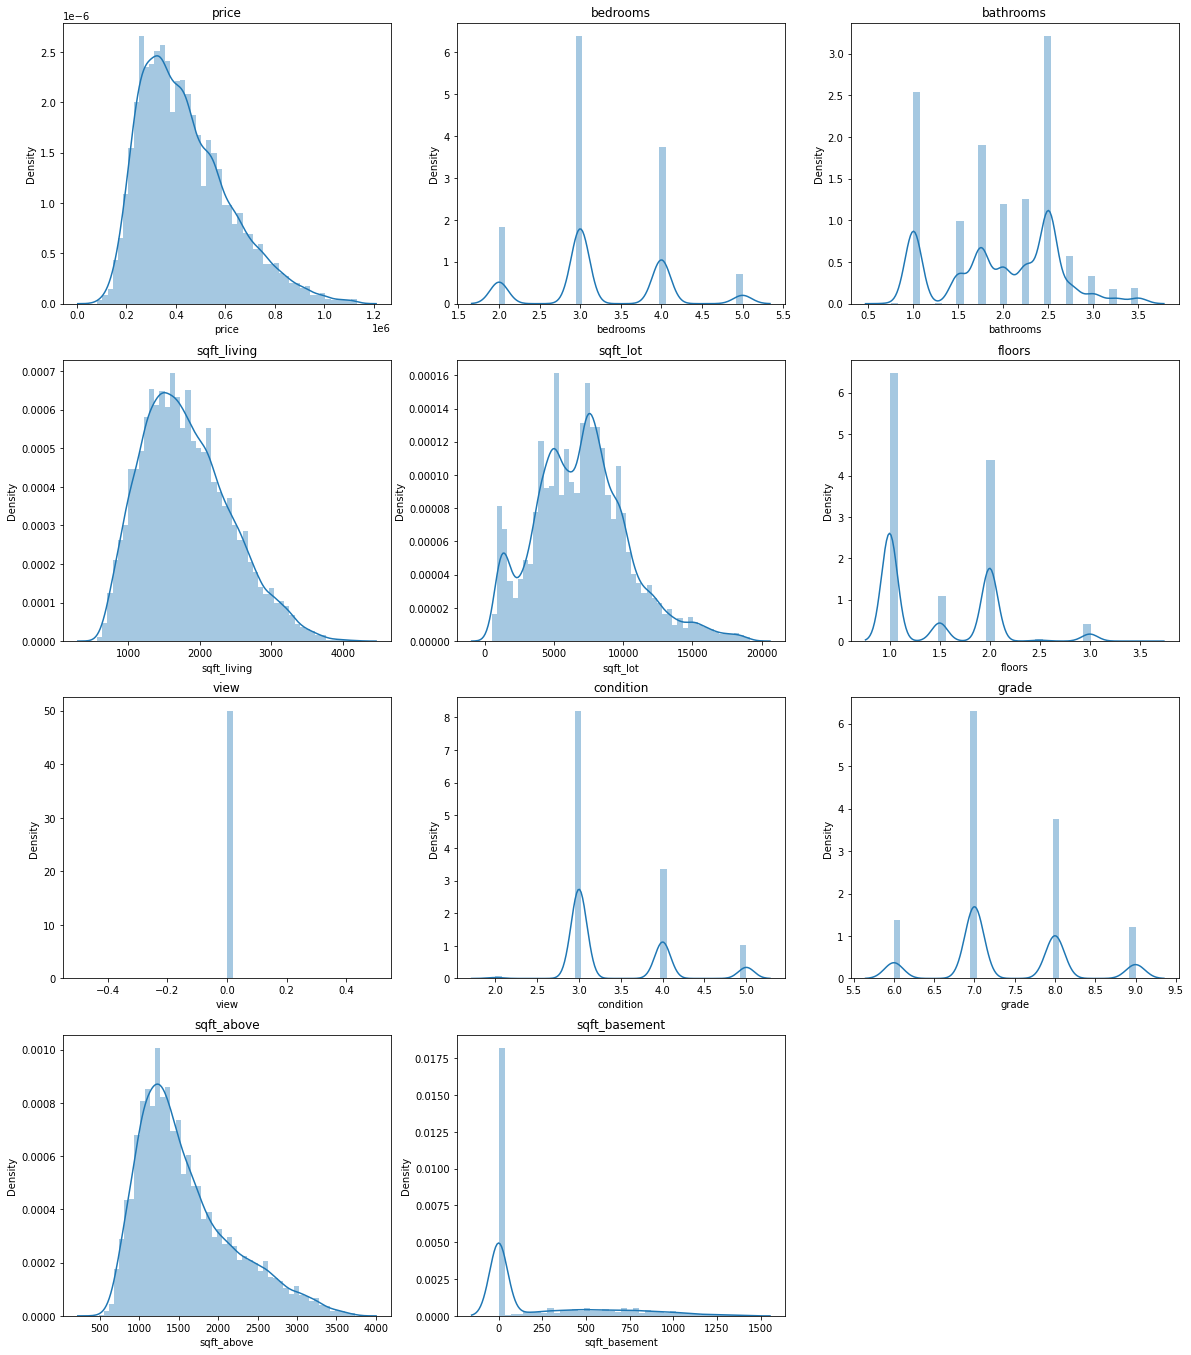

In [ ]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'price': 1, 'bedrooms': 2, 'bathrooms': 3, 'sqft_living': 4, 'sqft_lot': 5,
       'floors': 6, 'view': 7, 'condition': 8, 'grade': 9, 'sqft_above': 10,
       'sqft_basement': 11, }
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,3,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


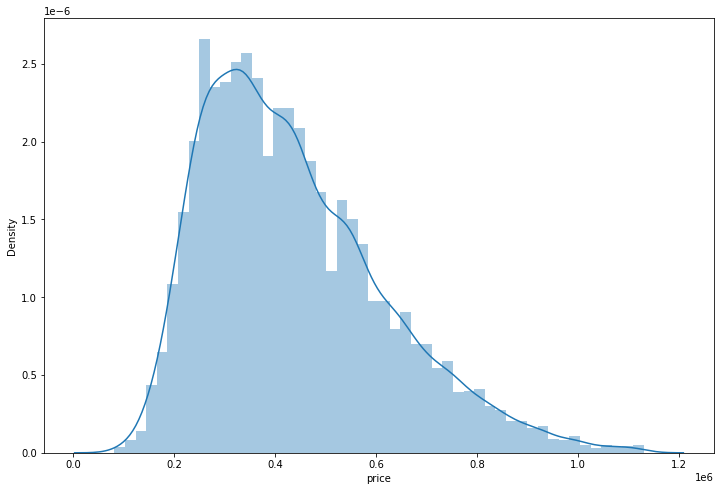

In [ ]:
#  House Price Distribution
# 

plt.figure(figsize = (12,8))
sns.distplot(df1['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


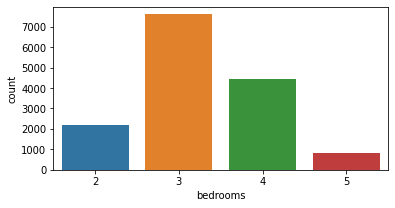

In [ ]:
plt.figure(figsize = (6,3))
sns.countplot(df1['bedrooms'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


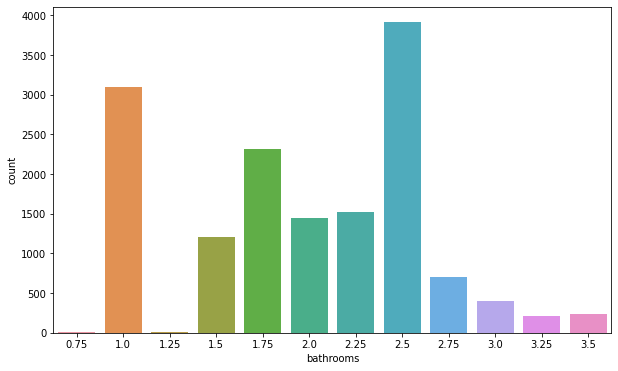

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df1['bathrooms'])
plt.show()

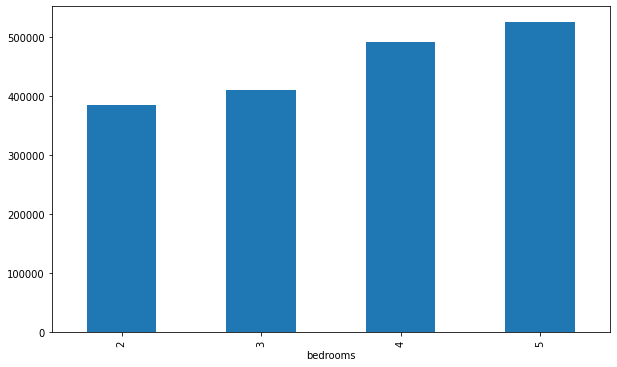

In [ ]:
groups = df1.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 6))
plt.xlabel('price')
groups.plot.bar()


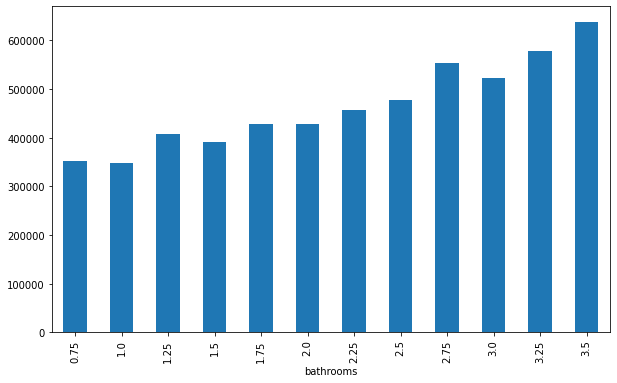

In [ ]:
groups1 = df1.groupby(['bathrooms'])['price'].mean()
plt.figure(figsize=(10, 6))
plt.xlabel('price')
groups1.plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


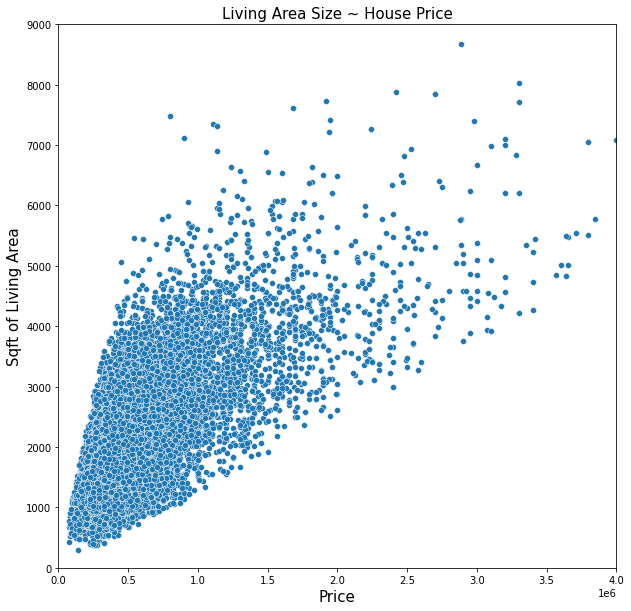

In [ ]:
# Scatter plot for living area distribution and price
# 

plt.figure(figsize=(10,10))
sns.scatterplot(house.price, house.sqft_living)
plt.xlim(0,4000000)
plt.ylim(0,9000)
plt.title('Living Area Size ~ House Price', size=15)
plt.ylabel('Sqft of Living Area', size=15)
plt.xlabel('Price', size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


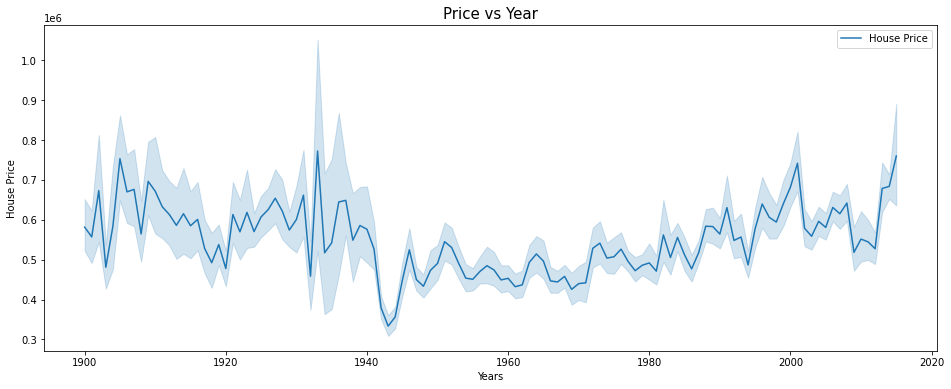

(<matplotlib.legend.Legend at 0x7fc4e4795bd0>, None)

In [ ]:
# Trends in price change over the years
# 
plt.figure(figsize=(16,6))
plt.title('Price vs Year', fontdict={'fontsize': 15}), plt.xlabel('Years'), plt.ylabel('House Price')
sns.lineplot(house.yr_built, house.price, label='House Price')
plt.legend(), plt.show()

In [ ]:
def plot_scatter(house, col, target):
    
    corr = house[[col, target]].corr()[col][1]    
    c = ["red"] if corr >= 0.7 else (["brown"] if corr >= 0.3 else\
                                    (["lightcoral"] if corr >= 0 else\
                                    (["blue"] if corr <= -0.7 else\
                                    (["royalblue"] if corr <= -0.3 else ["lightskyblue"]))))    

    fig, ax = plt.subplots(figsize = (6, 6))
    
    sns.scatterplot(x = col, y = target, data = house, c = c, ax = ax)        
    ax.set_title("Correlation between " + col + " and " + target + " is: " + str(corr.round(4)))

In [ ]:
house.head(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,1360,5000


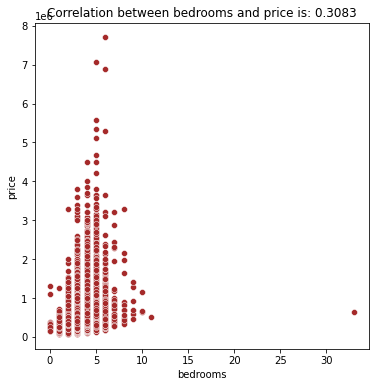

In [ ]:
plot_scatter(house, "bedrooms", "price")

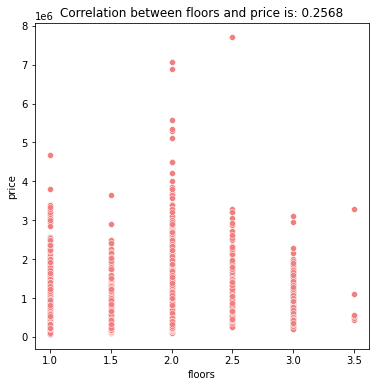

In [ ]:
plot_scatter(house,'floors' ,"price")

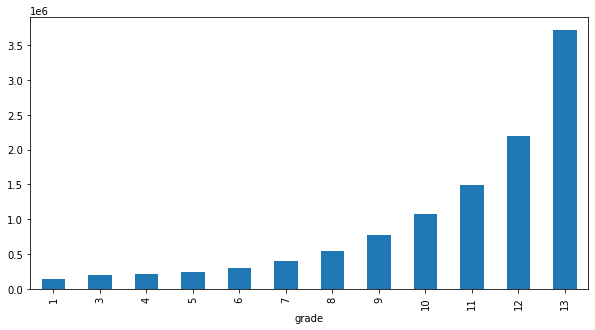

In [ ]:

groups3 = house.groupby(['grade'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups3.plot.bar()

**FEATURE ENGINEERING**

In [10]:
house['house_size']= house['sqft_living']+house['sqft_above']+house['sqft_basement']

In [11]:

house['Years'] = 2020 - house['yr_built']

In [12]:
house.drop(['sqft_living','sqft_above','sqft_basement','yr_built','zipcode'],axis=1,inplace=True)

In [13]:
house.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,yr_renovated,sqft_living15,sqft_lot15,house_size,Years
0,221900.0,3,1.00,5650,1.0,0,3,7,0,1340,5650,2360,65
1,538000.0,3,2.25,7242,2.0,0,3,7,1991,1690,7639,5140,69
2,180000.0,2,1.00,10000,1.0,0,3,6,0,2720,8062,1540,87
3,604000.0,4,3.00,5000,1.0,0,5,7,0,1360,5000,3920,55
4,510000.0,3,2.00,8080,1.0,0,3,8,0,1800,7503,3360,33


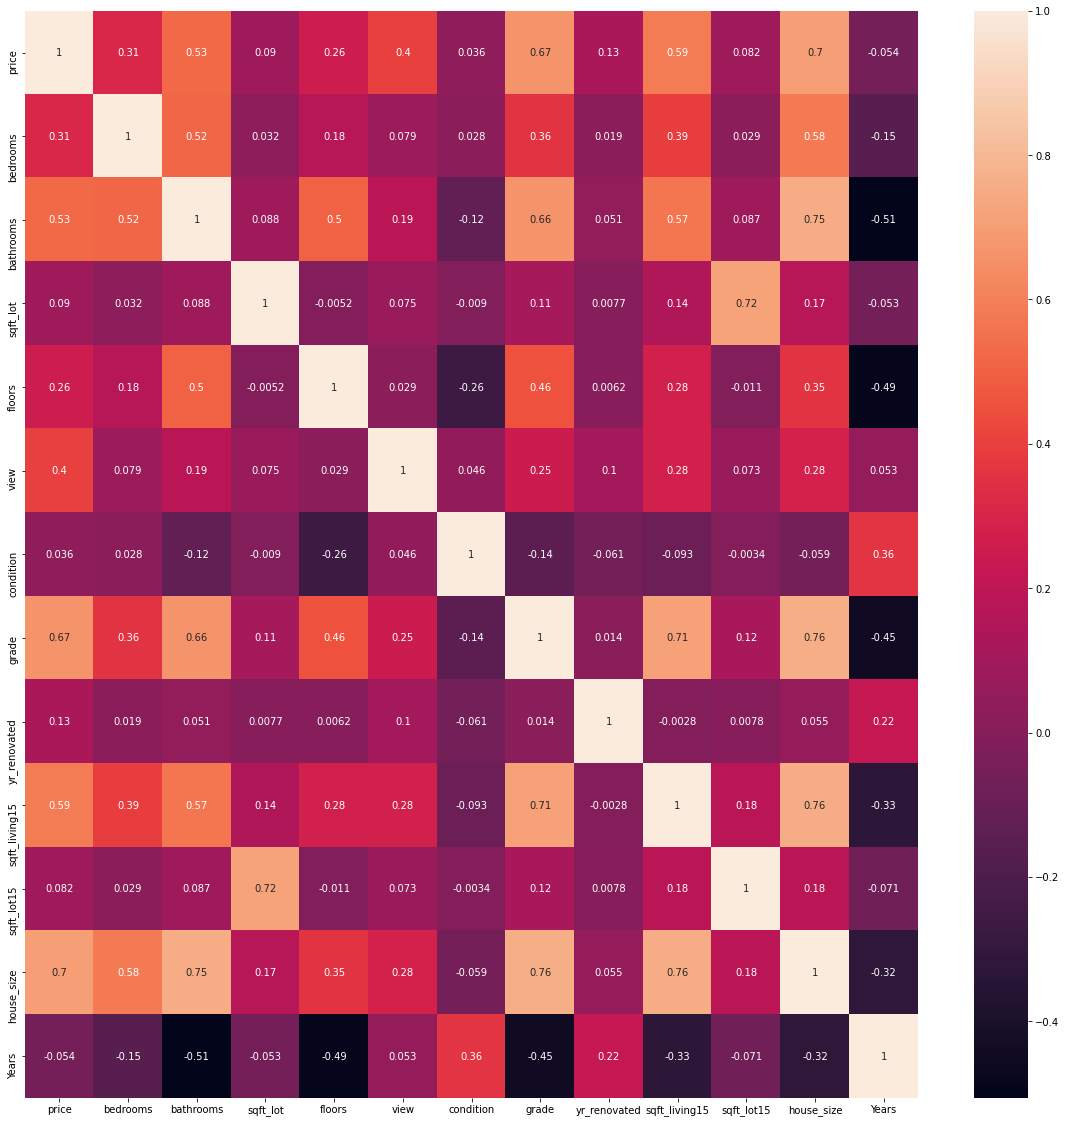

In [14]:
plt.subplots(figsize=(20,20))
sns.heatmap(house.corr(),annot=True)

**3.1.Linear Regression Model.**

The first model I implemented was the Multiple Linear Regression Model.
However this model has limitations.

It is sensitive to outliers as they affect the regression line and the forecasted values.
Multicollinearity in a LInear Regression Model increases the variance of the coefficients and makes the estimates senstive to minor changes.
These models also have the assumption of homoskedasticity,constant variance.
They are complex and fit the training data too well , hence overfitting .
Therefore in order for us to fit a Linear Regression Model we will first check for Multicolinearity using the VIF and then test for Homoskedasticity once we fit the model.

The first step would be to identify the feeatures and the target variable.
Then test for multicollinearity within the model and then drop the features with a high VIF score.

In [15]:
from sklearn import preprocessing
names = house.columns
d = preprocessing.normalize(house)
df3 = pd.DataFrame(d, columns=names)
df3.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,yr_renovated,sqft_living15,sqft_lot15,house_size,Years
0,0.999278,0.000014,0.000005,0.025444,0.000005,0.0,0.000014,0.000032,0.0000,0.006034,0.025444,0.010628,0.000293
1,0.999751,0.000006,0.000004,0.013458,0.000004,0.0,0.000006,0.000013,0.0037,0.003140,0.014195,0.009552,0.000128
2,0.997314,0.000011,0.000006,0.055406,0.000006,0.0,0.000017,0.000033,0.0000,0.015071,0.044669,0.008533,0.000482
3,0.999908,0.000007,0.000005,0.008277,0.000002,0.0,0.000008,0.000012,0.0000,0.002251,0.008277,0.006489,0.000091
4,0.999738,0.000006,0.000004,0.015839,0.000002,0.0,0.000006,0.000016,0.0000,0.003528,0.014708,0.006587,0.000065


In [16]:
#describe the data
X = df3.drop(['price','grade'],axis=1)
y = df3.price

In [17]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
# Scale the data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [19]:
# Fitting a Multiple Linear Regression Model
regression=LinearRegression()
regression = regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0048667077287548295
Mean Squared Error: 0.00016258665683159117
Root Mean Squared Error: 0.012750947291538427


In [21]:

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.0006052753820287119,
 'bathrooms': -0.0010166909292765249,
 'bedrooms': -0.0003657642876879267,
 'condition': 0.0013776856111133889,
 'floors': -0.0018357711551954263,
 'house_size': 0.00262506803541193,
 'sqft_living15': 0.0028350039444723966,
 'sqft_lot': -0.015492190120207047,
 'sqft_lot15': -0.009086125416185795,
 'view': -0.00010848977609500467,
 'yr_renovated': 0.00014209356220834646}

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7237985097784744

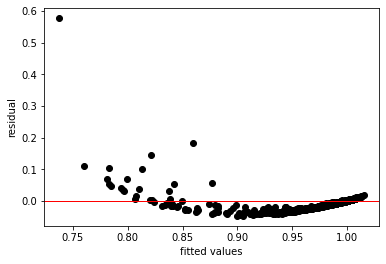

In [23]:
residuals =np.subtract(y_pred,y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Residual Plot using train data')

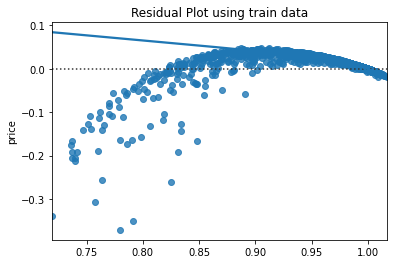

In [28]:
sns.residplot(x=regression.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot using train data')

Text(0.5, 1.0, 'Residual Plot using test data')

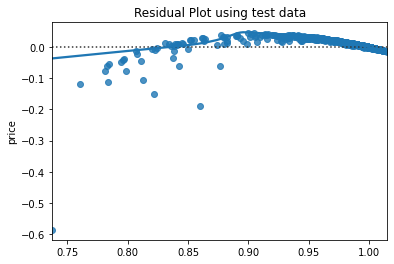

In [29]:
sns.residplot(x=regression.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot using test data')

Text(0, 0.5, 'Residuals')

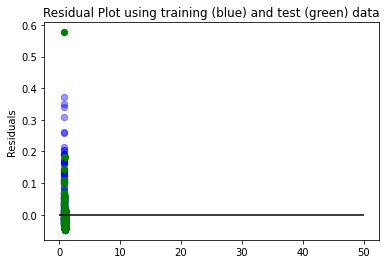

In [33]:
plt.scatter(regression.predict(X_train), regression.predict(X_train) - y_train, c='b', s=40, alpha=0.4)
plt.scatter(regression.predict(X_test), regression.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [24]:
#Checking for Multicollinearity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)
print(p_value)
print(critical_value)

1121.3658407363848
7.502077667639434e-246
inf


From using the barlett's test we determine that the p-value is too low.


**QUANTILE REGRESSION**

In [63]:
import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', data= df3,)
res = mod.fit(q=0.25)
quantile = res.summary()
quantile

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4784
Model:                       QuantReg   Bandwidth:                   0.0003156
Method:                 Least Squares   Sparsity:                     0.004309
Date:                Mon, 26 Apr 2021   No. Observations:                21610
Time:                        07:52:06   Df Residuals:                    21598
                                        Df Model:                           11
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9992   3.79e-05   2.64e+04      0.000       0.999       0.999
X[0]         165.2577      7.262     22.758      0.000     151.024     179.491
X[1]        -152.0882     11.821    -12.866      0.000    -175.258    -128.918
X[2]          -0.2015      0.000   -415.647      0.000      -0.202      -0.201
X[3]        -573.4048     10.094    -56.808      0.000    -593.189    -553.620
X[4]          -2.4950     11.127     -0.224      0.823     -24.305      19.315
X[5]         255.7798      6.264     40.831      0.000     243.501     268.058
X[6]           0.0878      0.014      6.301      0.000       0.060       0.115
X[7]           0.5905      0.013     44.257      0.000       0.564       0.617
X[8]          -0.1087      0.001   -175.546      0.000      -0.110      -0.107
X[9]           0.1388      0.007     19.006      0.000       0.124       0.153
X[10]          1.0098      0.215      4.699      0.000       0.589       1.431
==============================================================================

The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', data= df3,)
res = mod.fit(q=0.5)

quantile = res.summary()
quantile



<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3135
Model:                       QuantReg   Bandwidth:                   0.0001295
Method:                 Least Squares   Sparsity:                     0.001748
Date:                Mon, 26 Apr 2021   No. Observations:                21610
Time:                        07:52:16   Df Residuals:                    21598
                                        Df Model:                           11
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   1.76e-05   5.69e+04      0.000       1.000       1.000
X[0]          64.1654      3.195     20.085      0.000      57.903      70.427
X[1]         -55.3801      5.524    -10.026      0.000     -66.207     -44.553
X[2]          -0.0983      0.000   -659.719      0.000      -0.099      -0.098
X[3]        -245.4545      4.990    -49.188      0.000    -255.236    -235.673
X[4]         -13.1993      5.195     -2.541      0.011     -23.381      -3.018
X[5]          99.8990      2.799     35.697      0.000      94.414     105.384
X[6]           0.0168      0.007      2.513      0.012       0.004       0.030
X[7]           0.2484      0.006     41.554      0.000       0.237       0.260
X[8]          -0.0460      0.000   -246.426      0.000      -0.046      -0.046
X[9]           0.0668      0.003     19.557      0.000       0.060       0.073
X[10]          0.8479      0.095      8.911      0.000       0.661       1.034
==============================================================================

The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', data= df3,)
res = mod.fit(q=0.75)

quantile = res.summary()
quantile

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.2473
Model:                       QuantReg   Bandwidth:                   5.129e-05
Method:                 Least Squares   Sparsity:                     0.001126
Date:                Mon, 26 Apr 2021   No. Observations:                21610
Time:                        07:52:22   Df Residuals:                    21598
                                        Df Model:                           11
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0005   8.71e-06   1.15e+05      0.000       1.001       1.001
X[0]          23.3130      1.698     13.726      0.000      19.984      26.642
X[1]          -8.5741      2.967     -2.890      0.004     -14.389      -2.759
X[2]          -0.0524   5.02e-05  -1043.870      0.000      -0.053      -0.052
X[3]         -89.3669      2.612    -34.218      0.000     -94.486     -84.248
X[4]          -6.7306      2.932     -2.295      0.022     -12.478      -0.983
X[5]          27.4085      1.424     19.241      0.000      24.616      30.201
X[6]           0.0005      0.004      0.134      0.894      -0.007       0.008
X[7]           0.0911      0.003     29.959      0.000       0.085       0.097
X[8]          -0.0304   6.33e-05   -479.510      0.000      -0.031      -0.030
X[9]           0.0154      0.002      8.257      0.000       0.012       0.019
X[10]          0.4718      0.047      9.982      0.000       0.379       0.564
==============================================================================

The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Checking for Multicollinearity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)
print(p_value)
print(critical_value)

1193.6680972432944
1.450111066101194e-261
inf


The Quantile Regression models also appear to not be the best models for this Prediction.
The models have very low R-squared values.

**LASSO REGRESSION**

In [ ]:
#Fitting the model
lasso =linear_model.Lasso(alpha=0.001) 
lasso = lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test) 
print("lasso MSE:", mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

lasso MSE: 0.00016491414420051747
Root Mean Squared Error: 0.01284189021135586


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.0,
 'bathrooms': 0.0,
 'bedrooms': 0.0,
 'condition': 0.0,
 'floors': 0.0,
 'house_size': 0.0,
 'sqft_living15': 0.0,
 'sqft_lot': -0.0077089418184417965,
 'sqft_lot15': -0.00043794282231206585,
 'view': -0.0,
 'yr_renovated': -0.0}

In [ ]:
#lasso with diffrent coefficients
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [ ]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

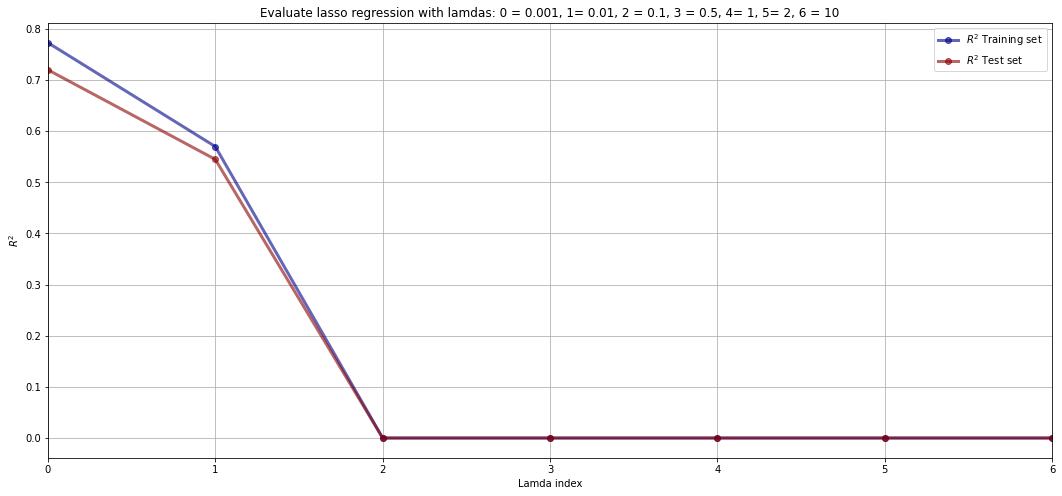

In [ ]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [ ]:
#identify the best labda
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    71.984458
lambda        0.001000
Name: 0, dtype: float64

In [ ]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([ 0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [ ]:
#cross validation
# the performance of a Lasso regression for different regularization parameters λ using 5-fold cross validation on the training set
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [ ]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

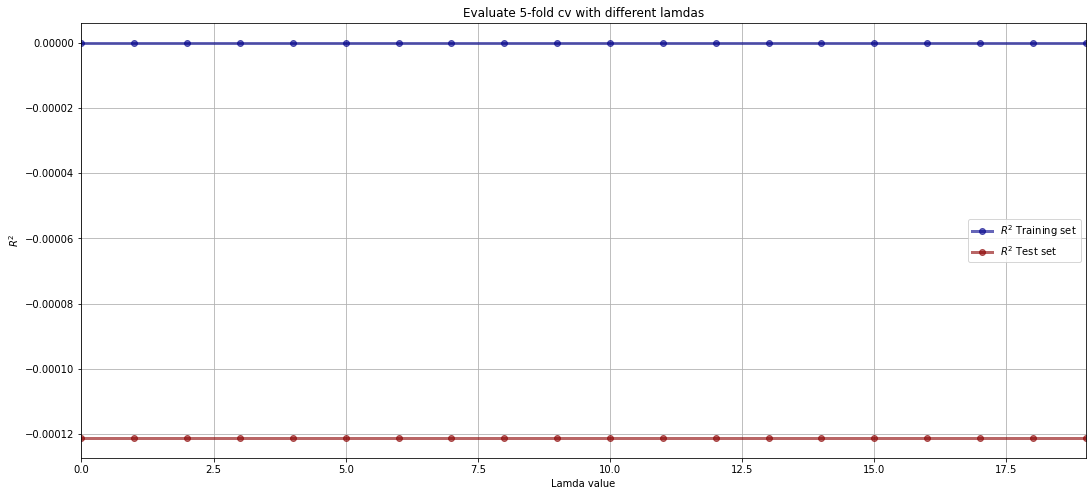

In [ ]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Best Model
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#best model
lasso = linear_model.Lasso(normalize=True,alpha =0.144737)
lasso.fit(X_train, y_train)
predicted = lasso.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df2.describe()

,Actual,Predicted
count,4322.000000,4.322000e+03
mean,0.996256,9.959891e-01
std,0.024265,8.527499e-14
min,0.160975,9.959891e-01
25%,0.998997,9.959891e-01
50%,0.999662,9.959891e-01
75%,0.999879,9.959891e-01
max,0.999992,9.959891e-01


**RIDGE REGRESSION**

The Ridge Regression Model works well with Multicollinearity however it performs poorly in the presence of outliers therefore I removed the outliers from my Target Variable.
The Ridge regression model focuses on the features that contribute more to the overall error.

It still uses information from the less important features.
The Ridge regression model uses the l2 regularization applying a penalty to the sum of squared values.
Its limitation is that it cannot be used for feature selection.

In [42]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
search.best_params_

{'alpha': 0.01291549665014884}

In [44]:
ridge = Ridge(normalize=True,alpha=1e-05)
ridge = ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('Mean squared error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean squared error 0.00016258668192554171
Root Mean Squared Error: 0.012750948275541773


In [45]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.000605299301967267,
 'bathrooms': -0.0010166062418907266,
 'bedrooms': -0.0003656783104465602,
 'condition': 0.0013776085538757716,
 'floors': -0.0018357143665415805,
 'house_size': 0.0026249607966232374,
 'sqft_living15': 0.002834919031212447,
 'sqft_lot': -0.015491999295737646,
 'sqft_lot15': -0.009086147433353089,
 'view': -0.00010848800602751301,
 'yr_renovated': 0.00014208250817722643}

In [46]:

from sklearn.metrics import r2_score
ridge = ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.7237984671489827

Text(0.5, 1.0, 'Residual Plot for train data')

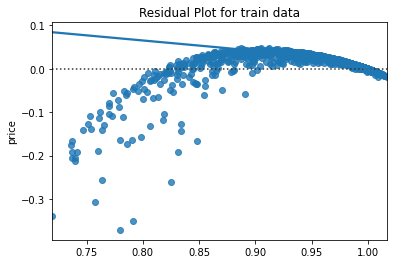

In [47]:

sns.residplot(x=ridge.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot for train data')


Text(0.5, 1.0, 'Residual Plot using test data')

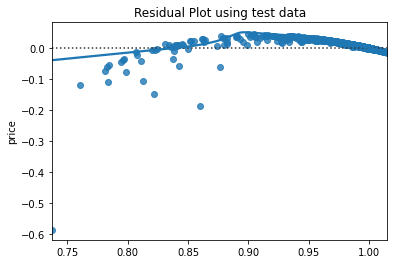

In [58]:
sns.residplot(x=ridge.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot using test data')

Text(0, 0.5, 'Residuals')

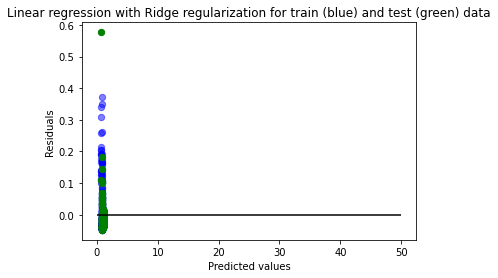

In [49]:
plt.scatter(ridge.predict(X_train), ridge.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(ridge.predict(X_test), ridge.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

**ELASTIC NET REGRESSION**

This is a combination of both lasso and ridge regression.

In [52]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:

search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.2}

In [54]:

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.2)
elastic = elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
print('Mean Squared Error :' ,mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error : 0.00016724242802111202
Root Mean Squared Error: 0.012932224403447073


In [55]:

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.0006689716780026711,
 'bathrooms': -0.0,
 'bedrooms': 4.3916881538357256e-05,
 'condition': 0.0006036303497180193,
 'floors': -0.0006002282592357195,
 'house_size': 0.001405801410173341,
 'sqft_living15': 0.0016318641940464436,
 'sqft_lot': -0.013269422301313054,
 'sqft_lot15': -0.008825549590958312,
 'view': -0.0,
 'yr_renovated': 0.0}

In [ ]:
from sklearn.metrics import r2_score
y_pred=elastic.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.7158893063682087

Text(0.5, 1.0, 'Residual Plot for train data')

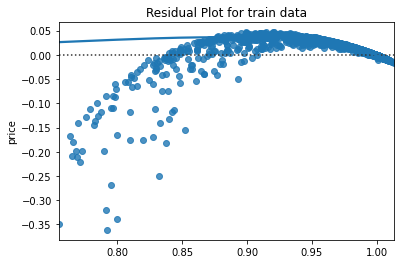

In [56]:
sns.residplot(x=elastic.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot for train data')


Text(0.5, 1.0, 'Residual Plot for test data')

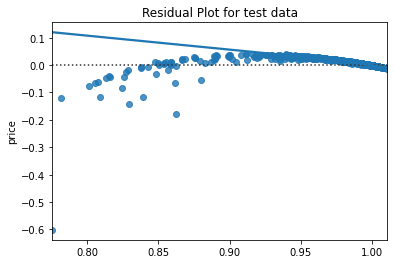

In [57]:
sns.residplot(x=elastic.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot for test data')

Text(0, 0.5, 'Residuals')

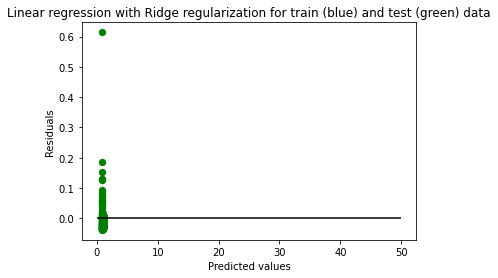

In [61]:
plt.scatter(elastic.predict(X_train), elastic.predict(X_train) - y_train, c='b', s=40, alpha=0.0001)
plt.scatter(elastic.predict(X_test), elastic.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

From our analysis we can determine that the RMSE of the regression are as follows:

Multiple Linear Regression 0.7237985097784744

Quantile regression could not be used for this analysis.

Lasso Regression 0.7236785097784744

Ridge Regression 0.7237984671489827

Elastic net 0.7158893063682087

We can determine that the Multiple Linear Regression is the best,but the accuracy is low ,thus more data is needed for accurate prediction.